# Plot action measure spatially
In this notebook, the output of AMf_automated or files in the output files are being plotted spatially and temporally.

In [1]:
import os, sys
import pandas as pd
import numpy as np
from numpy import ma
from matplotlib import pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import cartopy
import xarray as xr

These datasets can be generated from AMf_automated.ipynb, downloaded from the onedrive or be collected from Github if the file is small. Any dataset containing action_measure data can be plotted here.

In [2]:
# open dataset, for example these large ones in good resolution.
am_HM_asia_HADM3 = xr.open_dataset('output/am_HM_asia_HADM3.nc')
am_HM_bang_HADM3 = xr.open_dataset('output/am_HM_bang_HADM3.nc')

## Plot action measure data spatially
In order to **spatially** plot nc datasets containing latitude, longitude and time as coordinates, the time variable has to be specified. In the following function, either a specific day is plotted showing the action measure at a point in time. Time can also be constrained from variation by taking the mean, max value or sum of the action measure data, allowing for spatial analysis whilst taking time into account.

In [15]:
def plot_spatial_figures(am_daily, extent, fig_name):
    raph = am_daily['actionmeasure']
    lat = am_daily.variables['lat'][:]
    lon = am_daily.variables['lon'][:]
    am = am_daily.actionmeasure.isel(time = 1972)
    time = am_daily.variables['time'][:]
    print(time[1972])
    
    over_time = raph.mean(dim = 'time')
    count_am = raph.where(raph > 0)
    count_am = count_am.dropna(dim = 'time')
    count_am = count_am.count(dim='time')
    std = raph.std(dim = 'time')
    max_plt = raph.max(dim = 'time')
    
    fig = plt.figure(figsize = (20,10))
    
    ax1 = fig.add_subplot(221, projection = cartopy.crs.PlateCarree())
    p1 = ax1.pcolormesh(lon, lat, am.T, cmap = 'Reds', transform = cartopy.crs.PlateCarree())
    ax1.set_extent(extent)
    ax1.add_feature(cartopy.feature.COASTLINE)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-')
    cb1 = plt.colorbar(p1, shrink=0.5)
    plt.title('Action measure at specific day')
    
    ax2 = fig.add_subplot(222, projection = cartopy.crs.PlateCarree())
    am = over_time
    p2 = ax2.pcolormesh(lon, lat, am.T, cmap = 'Reds', transform = cartopy.crs.PlateCarree())
    ax2.set_extent(extent)
    ax2.add_feature(cartopy.feature.COASTLINE)
    ax2.add_feature(cartopy.feature.BORDERS, linestyle='-')
    cb2 = plt.colorbar(p2, shrink=0.5)
    cb2.ax.set_ylabel('Action measure in $^\circ$C*day', rotation=90)
    plt.title('Mean of action measure over time')

#     ax3 = fig.add_subplot(223, projection = cartopy.crs.PlateCarree())
#     p3 = ax3.pcolormesh(lon, lat, count_am.T, cmap = 'Reds', transform = cartopy.crs.PlateCarree())
#     ax3.set_extent(extent)
#     ax3.add_feature(cartopy.feature.COASTLINE)
#     ax3.add_feature(cartopy.feature.BORDERS, linestyle='-')
#     cb3 = plt.colorbar(p3, shrink=0.5)
#     cb3.ax.set_ylabel('Amount of events', rotation=90)
#     plt.title('Amount of extreme events')

    ax3 = fig.add_subplot(223, projection = cartopy.crs.PlateCarree())
    am = max_plt
    p3 = ax3.pcolormesh(lon, lat, am.T, cmap = 'Blues', transform = cartopy.crs.PlateCarree())
    ax3.set_extent(extent)
    ax3.add_feature(cartopy.feature.COASTLINE)
    ax3.add_feature(cartopy.feature.BORDERS, linestyle='-')
    cb3 = plt.colorbar(p3, shrink=0.5)
    cb3.ax.set_ylabel('Action measure in $^\circ$C*day', rotation=90)
    plt.title('Maximum value of action measure')


    ax4 = fig.add_subplot(224, projection = cartopy.crs.PlateCarree())
    p4 = ax4.pcolormesh(lon, lat, std.T, cmap = 'YlGn', transform = cartopy.crs.PlateCarree())
    ax4.set_extent(extent)
    ax4.add_feature(cartopy.feature.COASTLINE)
    ax4.add_feature(cartopy.feature.BORDERS, linestyle='-')
    cb4 = plt.colorbar(p4, shrink=0.5)
    cb4.ax.set_ylabel('Standard deviation in $^\circ$C*day', rotation=90)
    plt.title('Standard deviation')
    
    plt.savefig(fig_name)

In [16]:
# specify a spatial extent for plotting. Usually, correspond this with the spatial
# boundaries of the dataset being plotted.
bang_extent = [86, 95, 20, 27]
asia_extent = [70, 115, 8, 30]

<xarray.Variable ()>
array(cftime.Datetime360Day(1955, 6, 23, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)
Attributes:
    standard_name:  time
    axis:           T


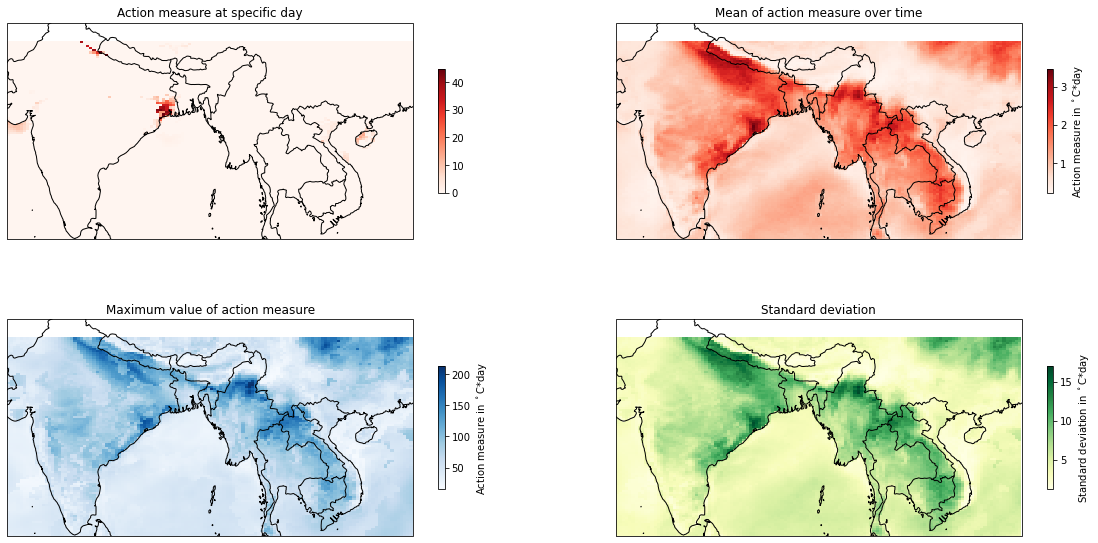

In [17]:
plot_spatial_figures(am_HM_asia_HADM3, asia_extent, 'plots/HM_asia_HADM3')

## Plot temporally (NOT FINISHED)

In [13]:
!cdo yearmean output/am_HM_asia_HADM3.nc output/yearmean_am_HM_asia_HADM3.nc

cdo    yearmean:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    yearmean: Processed 437483520 values from 1 variable over 36460 timesteps [28.10s 49MB].


In [16]:
yearmean_am_HM_asia_HADM3 = Dataset('output/yearmean_am_HM_asia_HADM3.nc')

In [23]:
#am = am_HM_asia_HADM3.variables['actionmeasure'][:]
#time = am_HM_asia_HADM3.variables['time'][:]
am_ymean = yearmean_am_HM_asia_HADM3['actionmeasure'][:]
time_ymean = yearmean_am_HM_asia_HADM3['time'][:]

TypeError: float() argument must be a string or a number, not 'cftime._cftime.Datetime360Day'

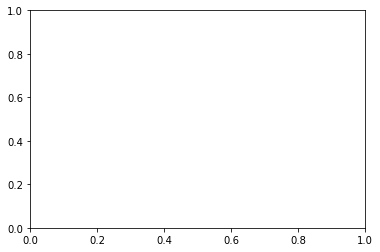

In [24]:
fig, ax = plt.subplots()
ax.plot(time, am[:, 0, 0], 'k')
ax.plot(time_ymean, am_ymean[:, 0, 0], 'r')